<a href="https://colab.research.google.com/github/myredex/tensorflow_tutorials/blob/master/04_images_multi_class_classification_fruits_kaggle_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification
Simple example to classify images using tensorflow

## Import Data

In [ ]:
# Import data from google drive
!gdown 1cU3I3fPIIX23sl16KaXf7BJ7Dm1V9Ijg

# Original here https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images

Downloading...
From: https://drive.google.com/uc?id=1cU3I3fPIIX23sl16KaXf7BJ7Dm1V9Ijg
To: /content/images_fruits_classification.zip
100% 214M/214M [00:01<00:00, 177MB/s]


In [ ]:
# Unzip it
import zipfile

zip_ref = zipfile.ZipFile("images_fruits_classification.zip")
zip_ref.extractall()
zip_ref.close()

In [44]:
# Import helper functions
def split_dir_to_train_test_val(directory = "data/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers'], dtype='<U10')

In [45]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="data/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder daisy. Train data copied. 350 files
Folder daisy. Test data copied. 99 files
Folder daisy. Validation data copied. 51 files
Folder dandelion. Train data copied. 350 files
Folder dandelion. Test data copied. 99 files
Folder dandelion. Validation data copied. 51 files
Folder roses. Train data copied. 350 files
Folder roses. Test data copied. 99 files
Folder roses. Validation data copied. 51 files
Folder sunflowers. Train data copied. 350 files
Folder sunflowers. Test data copied. 99 files
Folder sunflowers. Validation data copied. 51 files


## Explore and visualize the data

In [46]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers'], dtype='<U10')

In [47]:
len(class_names)

4

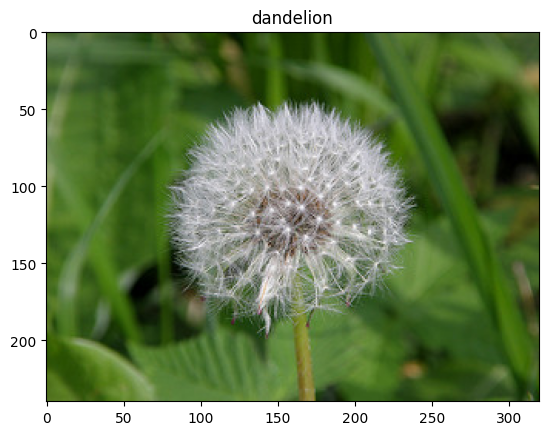

In [48]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(target_dir + "/" + target_class + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("data/", "dandelion")

## Create datasets from directories

In [64]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 1400 images belonging to 4 classes.
Found 396 images belonging to 4 classes.
Found 204 images belonging to 4 classes.


## Create and fit the model

In [77]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(9, activation="softmax")
])
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [78]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

# logdir='logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# history = model.fit(train_data, epochs=5, validation_data=validation_data, callbacks=[tensorboard_callback])

Epoch 1/5
44/44 [==============================] - 9s 199ms/step - loss: 1.2478 - accuracy: 0.4657 - val_loss: 1.2346 - val_accuracy: 0.4804
Epoch 2/5
44/44 [==============================] - 9s 193ms/step - loss: 1.1912 - accuracy: 0.5136 - val_loss: 1.2213 - val_accuracy: 0.4706
Epoch 3/5
44/44 [==============================] - 9s 195ms/step - loss: 1.1352 - accuracy: 0.5579 - val_loss: 1.2110 - val_accuracy: 0.4657
Epoch 4/5
44/44 [==============================] - 9s 206ms/step - loss: 1.1005 - accuracy: 0.5807 - val_loss: 1.1729 - val_accuracy: 0.5343
Epoch 5/5
44/44 [==============================] - 9s 200ms/step - loss: 1.0571 - accuracy: 0.6043 - val_loss: 1.1783 - val_accuracy: 0.5049


## Evaluate model

In [155]:
model.evaluate(test_data)

13/13 [==============================] - 1s 69ms/step - loss: 1.1581 - accuracy: 0.5354


[1.1580984592437744, 0.5353535413742065]

<AxesSubplot: >

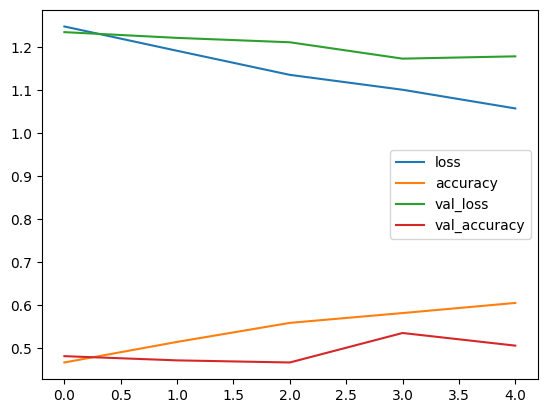

In [94]:
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot()

## Make a prediction

In [170]:
import cv2

def load_and_resize_image(filename, size):
  # Load image
  img = tf.io.read_file(filename)
  # Compile image
  img = tf.image.decode_image(img)
  # Resize image
  img = tf.image.resize(img, [size, size])
  # Scale the tensor
  img = img / 255
  return img

image = load_and_resize_image("Sunflower.jpg", 240)

In [171]:
pred = model.predict(tf.expand_dims(image, axis=0))

1/1 [==============================] - 0s 19ms/step


In [172]:
class_names[pred[0].argmax()]

'sunflowers'